# Logistic Regression on iris dataset (without standardization)

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

In [2]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df[df.columns[:-1]]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
x = df[df.columns[:-1]]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y = df[df.columns[-1:]]
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


## Standardization

In [6]:
# len(x)

In [7]:
# for i in x.columns:
#     mean = x[i].mean()
#     std = x[i].std()
#     for j in range(len(x)):
#         x[i][j] = (x[i][j] - mean) / std

# x

## Adding 'x0' column = 1 in x for coding purpose 

In [8]:
x['x0'] = 1
x

,sepal_length,sepal_width,petal_length,petal_width,x0
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [9]:
columns = list()
columns.append(x.columns[-1])

for i in x.columns[:-1]:
    columns.append(i)
columns

['x0', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [10]:
x[columns]

,x0,sepal_length,sepal_width,petal_length,petal_width
0,1,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,1,4.7,3.2,1.3,0.2
3,1,4.6,3.1,1.5,0.2
4,1,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,1,6.7,3.0,5.2,2.3
146,1,6.3,2.5,5.0,1.9
147,1,6.5,3.0,5.2,2.0
148,1,6.2,3.4,5.4,2.3


In [11]:
x = x[columns]
x

,x0,sepal_length,sepal_width,petal_length,petal_width
0,1,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,1,4.7,3.2,1.3,0.2
3,1,4.6,3.1,1.5,0.2
4,1,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,1,6.7,3.0,5.2,2.3
146,1,6.3,2.5,5.0,1.9
147,1,6.5,3.0,5.2,2.0
148,1,6.2,3.4,5.4,2.3


## Modifying Output Class 

In [12]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [13]:
y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
dtype: int64

In [14]:
classes = list()
check = dict()

for i in y[y.columns[0]]:
    if i not in check:
        check[i] = 1
        classes.append(i)
    else:
        check[i] = check[i] + 1

In [15]:
classes

['setosa', 'versicolor', 'virginica']

In [16]:
check

{'setosa': 50, 'versicolor': 50, 'virginica': 50}

In [17]:
y_multiclass = np.zeros((len(y),len(classes)))
y_multiclass

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [18]:
y_multiclass.shape

(150, 3)

In [19]:
for j in range(len(classes)):
    for i in range(len(y)):
        if y.iloc[i,0] == classes[j]:
            y_multiclass[i,j] = 1

y_multiclass

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [20]:
y_df = pd.DataFrame(data=y_multiclass,columns=classes)

In [21]:
y_df

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y_df,test_size=0.25,random_state=101)

In [23]:
x_train

,x0,sepal_length,sepal_width,petal_length,petal_width
94,1,5.6,2.7,4.2,1.3
135,1,7.7,3.0,6.1,2.3
21,1,5.1,3.7,1.5,0.4
22,1,4.6,3.6,1.0,0.2
29,1,4.7,3.2,1.6,0.2
...,...,...,...,...,...
63,1,6.1,2.9,4.7,1.4
70,1,5.9,3.2,4.8,1.8
81,1,5.5,2.4,3.7,1.0
11,1,4.8,3.4,1.6,0.2


In [24]:
y_train

,setosa,versicolor,virginica
94,0.0,1.0,0.0
135,0.0,0.0,1.0
21,1.0,0.0,0.0
22,1.0,0.0,0.0
29,1.0,0.0,0.0
...,...,...,...
63,0.0,1.0,0.0
70,0.0,1.0,0.0
81,0.0,1.0,0.0
11,1.0,0.0,0.0


# Logistic Regression

## Initializing weights

In [25]:
n = len(x_train.columns)
n

5

In [26]:
w = np.zeros((len(x_train.columns),len(classes)))
w

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

## Adjusting Weights

In [27]:
import math
math.exp(1)

2.718281828459045

In [28]:
w.shape

(5, 3)

In [29]:
x_train

,x0,sepal_length,sepal_width,petal_length,petal_width
94,1,5.6,2.7,4.2,1.3
135,1,7.7,3.0,6.1,2.3
21,1,5.1,3.7,1.5,0.4
22,1,4.6,3.6,1.0,0.2
29,1,4.7,3.2,1.6,0.2
...,...,...,...,...,...
63,1,6.1,2.9,4.7,1.4
70,1,5.9,3.2,4.8,1.8
81,1,5.5,2.4,3.7,1.0
11,1,4.8,3.4,1.6,0.2


In [30]:
x_train.iloc[0,2]

2.7

In [31]:
y_train

,setosa,versicolor,virginica
94,0.0,1.0,0.0
135,0.0,0.0,1.0
21,1.0,0.0,0.0
22,1.0,0.0,0.0
29,1.0,0.0,0.0
...,...,...,...
63,0.0,1.0,0.0
70,0.0,1.0,0.0
81,0.0,1.0,0.0
11,1.0,0.0,0.0


In [32]:
y_train.iloc[1,0]

0.0

In [33]:
# math.log is what we interpret ln in math
math.log(10)

2.302585092994046

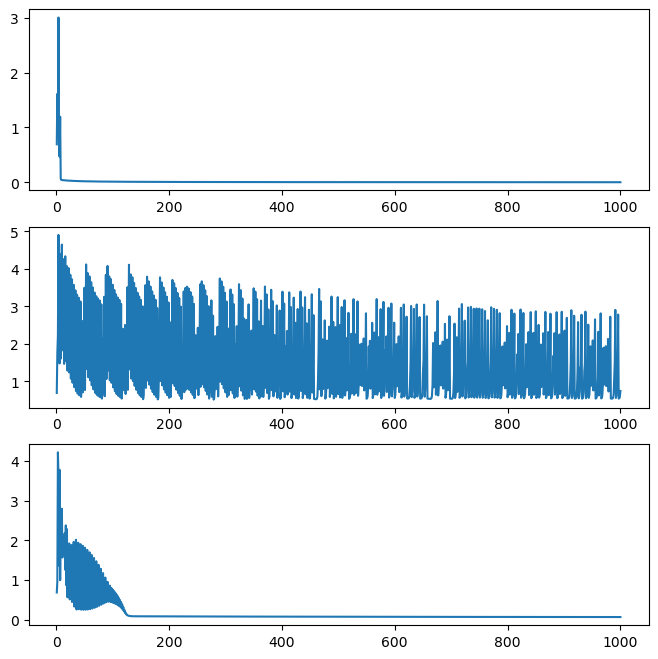

In [34]:
fig, axs = plt.subplots(len(classes), 1, figsize=(8,8))

for k in range(len(classes)):
        
    count_list = list()
    loss_list = list()

    for count in range(1,1001):

        count_list.append(count)

        
        # calculating predicted value (pre threshold) using sigmoid function

        linear_sum = 0
        y_cap = list()

        for j in range(len(x_train)):
            for i in range(len(x_train.columns)):
                linear_sum = linear_sum + w[i,k] * x_train.iloc[j,i]

            predicted_value = 1 / (1 + math.exp(-1*linear_sum))
            y_cap.append(predicted_value)
            linear_sum = 0


        # calculating average loss

        loss_sum = 0

        for i in range(len(y_train)):
            loss = -1 * y_train.iloc[i,k] * math.log(y_cap[i]) - (1 - y_train.iloc[i,k]) * math.log(1 - y_cap[i])
            loss_sum = loss_sum + loss

        avg_loss = loss_sum / len(y_train)
        loss_list.append(avg_loss)


        # optimizing with gradient descent

        gradient_sum = 0
        dw_list = list()

        for i in range(len(x.columns)):
            for j in range(len(x_train)):
                gradient_sum = gradient_sum + (y_cap[j] - y_train.iloc[j,k]) * x_train.iloc[j,i]
            dw = gradient_sum / len(x_train)
            dw_list.append(dw)
            gradient_sum = 0


        # updating weights

        learning_rate = 0.5

        for i in range(len(dw_list)):
            w[i,k] = w[i,k] - learning_rate * dw_list[i]
    
    axs[k].plot(count_list, loss_list)

In [35]:
w

array([[ 0.43852744,  3.95862254, -2.93599507],
       [ 0.67371264,  1.25386328, -3.46316139],
       [ 2.5384416 , -5.32498222, -3.81625581],
       [-3.82061011,  1.70448673,  5.15066625],
       [-1.81308562, -6.42151012,  6.09964914]])

## Training Accuracy

just checking if the updated weights after 300 iterations are performing well on train dataset

In [36]:
y_train.shape

(112, 3)

In [37]:
y_prediction = np.zeros((y_train.shape[0],y_train.shape[1]))
y_prediction.shape

(112, 3)

In [38]:
y_prediction

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [39]:
y_prediction[0,0]

0.0

In [40]:
x_train.shape

(112, 5)

In [41]:
# calculating predicted value using sigmoid function

linear_sum = 0
y_cap = list()

for k in range(len(classes)):
    for j in range(len(x_train)):
        for i in range(len(x_train.columns)):
            linear_sum = linear_sum + w[i,k] * x_train.iloc[j,i]

        predicted_value = 1 / (1 + math.exp(-1*linear_sum))
        y_prediction[j,k] = predicted_value
        linear_sum = 0

In [42]:
y_prediction

array([[6.49626439e-04, 1.00875556e-02, 4.43089762e-02],
       [6.57790268e-07, 1.18872915e-03, 9.87837394e-01],
       [9.98899123e-01, 8.60081156e-05, 2.17282990e-11],
       [9.99795097e-01, 1.20546113e-04, 4.04126933e-12],
       [9.94792305e-01, 3.18762515e-03, 2.89207600e-10],
       [6.65447615e-05, 2.44912174e-03, 1.87671915e-01],
       [3.07806640e-04, 9.51266465e-04, 1.89848570e-01],
       [9.98595736e-01, 4.53255053e-03, 1.02551227e-10],
       [1.35478358e-06, 1.43867310e-03, 9.85585280e-01],
       [1.87413156e-03, 7.04670566e-02, 2.21819453e-03],
       [9.96654089e-01, 1.10927021e-02, 6.87933121e-11],
       [3.78456582e-02, 7.32339293e-03, 3.43100203e-04],
       [1.76585760e-03, 6.01792532e-02, 6.22383372e-03],
       [9.92230419e-01, 5.35248703e-04, 5.15540569e-10],
       [8.04765974e-06, 1.28667127e-03, 9.89350223e-01],
       [9.99278898e-01, 3.93507187e-04, 7.93720166e-12],
       [1.00595757e-02, 3.00579657e-02, 2.55370761e-03],
       [7.34124377e-07, 6.75061

In [43]:
max = -1
y_cap = list()

for i in range(y_prediction.shape[0]):
    for j in range(y_prediction.shape[1]):
        if y_prediction[i,j] > max:
            max = y_prediction[i,j]
            class_name = classes[j]
    
    y_cap.append(class_name)
    max = -1

y_cap

['virginica',
 'virginica',
 'setosa',
 'setosa',
 'setosa',
 'virginica',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'setosa',
 'setosa',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'versicolor',
 'virginica',
 'versicolor',
 'setosa',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'versicolor',
 'virginica',
 'setosa',
 'setosa',
 'setosa',
 'virginica',
 'setosa',
 'setosa',
 'setosa',
 'virginica',
 'setosa',
 'setosa',
 'virginica',
 'virginica',
 'setosa',
 'setosa',
 'virginica',
 'virginica',
 'virginica',
 'setosa',
 'versicolor',
 'virginica',
 'setosa',
 'setosa',
 'virginica',
 'virginica',
 'setosa',
 'versicolor',
 'setosa',
 'virginica',
 'virginica',
 'setosa',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'virginica',
 'setosa',
 'versicolor',
 'setosa',

In [44]:
x_train.index

Int64Index([ 94, 135,  21,  22,  29,  77,  66,  13, 102,  67,
            ...
            132,  40, 137,  75,  87,  63,  70,  81,  11,  95],
           dtype='int64', length=112)

In [45]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [46]:
y_train

,setosa,versicolor,virginica
94,0.0,1.0,0.0
135,0.0,0.0,1.0
21,1.0,0.0,0.0
22,1.0,0.0,0.0
29,1.0,0.0,0.0
...,...,...,...
63,0.0,1.0,0.0
70,0.0,1.0,0.0
81,0.0,1.0,0.0
11,1.0,0.0,0.0


In [47]:
y_train.index

Int64Index([ 94, 135,  21,  22,  29,  77,  66,  13, 102,  67,
            ...
            132,  40, 137,  75,  87,  63,  70,  81,  11,  95],
           dtype='int64', length=112)

In [48]:
for i in y_train.index:
    print(y[y.columns[0]][i])

versicolor
virginica
setosa
setosa
setosa
versicolor
versicolor
setosa
virginica
versicolor
setosa
versicolor
versicolor
setosa
virginica
setosa
versicolor
virginica
versicolor
setosa
setosa
versicolor
setosa
versicolor
virginica
virginica
versicolor
setosa
versicolor
setosa
virginica
virginica
versicolor
virginica
versicolor
virginica
setosa
setosa
setosa
versicolor
setosa
setosa
setosa
virginica
setosa
setosa
virginica
virginica
setosa
setosa
virginica
virginica
virginica
setosa
versicolor
virginica
setosa
setosa
virginica
virginica
setosa
versicolor
setosa
virginica
virginica
setosa
virginica
versicolor
versicolor
virginica
setosa
virginica
setosa
versicolor
virginica
setosa
versicolor
setosa
virginica
versicolor
virginica
setosa
virginica
virginica
virginica
versicolor
setosa
setosa
virginica
versicolor
setosa
versicolor
virginica
virginica
virginica
versicolor
setosa
virginica
setosa
virginica
versicolor
virginica
virginica
setosa
virginica
versicolor
versicolor
versicolor
versico

In [49]:
# measuring accuracy

right = 0
wrong = 0

j = 0
for i in y_train.index:
    if y_cap[j] == y[y.columns[0]][i]:
        right = right + 1
    else:
        wrong = wrong + 1
    j = j + 1

accuracy = ( right * 100 ) / len(y_train)

print('Total :',len(y_train))
print('Right :',right)
print('Wrong :',wrong)
print('Accuracy :',accuracy)

Total : 112
Right : 93
Wrong : 19
Accuracy : 83.03571428571429


## Test Accuracy

In [50]:
y_test.shape

(38, 3)

In [51]:
y_prediction = np.zeros((y_test.shape[0],y_test.shape[1]))
y_prediction.shape

(38, 3)

In [52]:
y_prediction

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [53]:
y_prediction[0,0]

0.0

In [54]:
x_test.shape

(38, 5)

In [55]:
# calculating predicted value (post threshold) using sigmoid function

linear_sum = 0
y_cap = list()

for k in range(len(classes)):
    for j in range(len(x_test)):
        for i in range(len(x_test.columns)):
            linear_sum = linear_sum + w[i,k] * x_test.iloc[j,i]

        predicted_value = 1 / (1 + math.exp(-1*linear_sum))
        y_prediction[j,k] = predicted_value
        linear_sum = 0

In [56]:
y_prediction

array([[9.99887667e-01, 3.01868089e-05, 1.42306314e-13],
       [9.99747657e-01, 3.07153383e-05, 1.27926115e-12],
       [9.95892434e-01, 7.22557695e-05, 3.73597593e-10],
       [5.25727540e-06, 3.30251969e-02, 5.77807256e-01],
       [7.32980395e-04, 5.05000066e-03, 1.30206202e-03],
       [2.90101937e-05, 3.24877246e-03, 7.61301931e-01],
       [6.05332873e-05, 1.25158601e-01, 3.83223912e-01],
       [4.72458010e-04, 5.10473759e-02, 9.72147575e-02],
       [9.94041184e-06, 5.86465390e-03, 9.54701002e-01],
       [9.96472292e-01, 8.40561139e-03, 1.10789323e-10],
       [1.57231699e-05, 3.91199347e-04, 8.89677513e-01],
       [9.99783395e-01, 7.95427490e-05, 5.35744616e-13],
       [9.98075433e-01, 6.18664095e-04, 2.41562667e-11],
       [6.89070177e-08, 6.18301716e-02, 9.98375466e-01],
       [5.42939033e-05, 5.13118076e-04, 6.69867562e-01],
       [1.26191040e-03, 1.12311314e-02, 2.26037632e-03],
       [2.03571630e-03, 1.73630653e-03, 8.73892507e-03],
       [1.15395712e-03, 3.96639

In [57]:
max = -1
y_cap = list()

for i in range(y_prediction.shape[0]):
    for j in range(y_prediction.shape[1]):
        if y_prediction[i,j] > max:
            max = y_prediction[i,j]
            class_name = classes[j]
    
    y_cap.append(class_name)
    max = -1

y_cap

['setosa',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'setosa',
 'virginica',
 'virginica',
 'versicolor',
 'virginica',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'setosa',
 'virginica',
 'versicolor',
 'versicolor',
 'setosa',
 'versicolor',
 'virginica',
 'setosa',
 'setosa',
 'virginica',
 'virginica',
 'virginica',
 'versicolor',
 'virginica',
 'virginica',
 'virginica',
 'virginica']

In [58]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [59]:
y_test

,setosa,versicolor,virginica
33,1.0,0.0,0.0
16,1.0,0.0,0.0
43,1.0,0.0,0.0
129,0.0,0.0,1.0
50,0.0,1.0,0.0
123,0.0,0.0,1.0
68,0.0,1.0,0.0
53,0.0,1.0,0.0
146,0.0,0.0,1.0
1,1.0,0.0,0.0


In [60]:
y_test.index

Int64Index([ 33,  16,  43, 129,  50, 123,  68,  53, 146,   1, 147,  32,  31,
            122, 127,  74,  88,  96,  42, 134,  80,  48,  90,  65,  97,  64,
             93, 114,  25,  41, 104,  89, 116,  82, 112,  55,  86,  61],
           dtype='int64')

In [61]:
for i in y_test.index:
    print(y[y.columns[0]][i])

setosa
setosa
setosa
virginica
versicolor
virginica
versicolor
versicolor
virginica
setosa
virginica
setosa
setosa
virginica
virginica
versicolor
versicolor
versicolor
setosa
virginica
versicolor
setosa
versicolor
versicolor
versicolor
versicolor
versicolor
virginica
setosa
setosa
virginica
versicolor
virginica
versicolor
virginica
versicolor
versicolor
versicolor


In [62]:
# measuring accuracy

right = 0
wrong = 0

j = 0
for i in y_test.index:
    if y_cap[j] == y[y.columns[0]][i]:
        right = right + 1
    else:
        wrong = wrong + 1
    j = j + 1

accuracy = ( right * 100 ) / len(y_test)

print('Total :',len(y_test))
print('Right :',right)
print('Wrong :',wrong)
print('Accuracy :',accuracy)

Total : 38
Right : 28
Wrong : 10
Accuracy : 73.6842105263158
